<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-задачи" data-toc-modified-id="Цели-и-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и задачи</a></span><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных</a></span></li><li><span><a href="#Статистическая-проверка-гипотезы" data-toc-modified-id="Статистическая-проверка-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Статистическая проверка гипотезы</a></span></li><li><span><a href="#Разделение-выборок" data-toc-modified-id="Разделение-выборок-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Разделение выборок</a></span></li><li><span><a href="#Строим-модель" data-toc-modified-id="Строим-модель-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Строим модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение-baseline" data-toc-modified-id="Обучение-baseline-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Обучение baseline</a></span></li><li><span><a href="#Обучение-CatBoost" data-toc-modified-id="Обучение-CatBoost-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Обучение CatBoost</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Предсказание оттока клиентов в телекоме

## Цели и задачи

**Вводные данные:**
Оператор связи «» планирует бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. 

**Оператор предоставляет два основных типа услуг:**
1. Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
2. Интернет. Подключение бывает двух типов: через телефонную линию DSL (англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (англ. fiber optic).
**Дополнительные услуги:**
1. Интернет-безопасность: антивирус (Device Protection) и блокировка опасных сайтов (Online Security);
2. Выделенная линия технической поддержки (Tech Support);
3. Облачное хранилище файлов для резервного копирования данных (Online Backup);
4. Стриминговое телевидение (Streaming TV) и каталог фильмов (Streaming Movies).

За услуги клиенты могут платить ежемесячно или раз в 1–2 года. Доступны различные способы расчёта и возможность получить электронный чек.

### Задача
Обучить модель для прогноза оттока клиентов.

### Описание данных

Данные хранятся в Sqlite  — СУБД, в которой база данных представлена одним файлом. 

**Таблицы:**
- contract — информация о договорах;
- personal — персональные данные клиентов;
- internet — информация об интернет-услугах;
- phone — информация об услугах телефонии.

**Таблица contract**
- customerID — ID абонента;
- BeginDate — дата начала действия договора;
- EndDate — дата окончания действия договора;
- Type — тип оплаты: раз в год-два или ежемесячно;
- PaperlessBilling — электронный расчётный лист;
- PaymentMethod — тип платежа;
- MonthlyCharges — расходы за месяц;
- TotalCharges — общие расходы абонента.

**Таблица personal**
- customerID — ID пользователя;
- gender — пол;
- SeniorCitizen — является ли абонент пенсионером;
- Partner — есть ли у абонента супруг или супруга;
- Dependents — есть ли у абонента дети.

**Таблица internet**
- customerID — ID пользователя;
- InternetService — тип подключения;
- OnlineSecurity — блокировка опасных сайтов;
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;
- DeviceProtection — антивирус;
- TechSupport — выделенная линия технической поддержки;
- StreamingTV — стриминговое телевидение;
- StreamingMovies — каталог фильмов.

**Таблица phone**
- customerID — ID пользователя;
- MultipleLines — подключение телефона к нескольким линиям одновременно.

Информация о договорах актуальна на 1 февраля 2020.

## Загрузка данных

In [1]:
# База и графики
import os
from math import sqrt
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sqlalchemy import create_engine

# Корреляция и анализ признаков
from scipy.stats import chi2_contingency

# Модели
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb

# Подготовка данных
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
    )

# Подбор параметров


# Функции для оценки
from sklearn.metrics import (
    f1_score,
    mean_absolute_error, 
    r2_score, 
    confusion_matrix, 
    recall_score, 
    precision_score,
    roc_curve,
    roc_auc_score,
    accuracy_score
    )

# Настраиваю отображение
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
RANDOM_STATE = 16122024
END_DATE = '2020-02-01'
TEST_SIZE = 0.25

In [3]:
path_to_db = 'ds-plus-final.db'
engine = create_engine(f'sqlite:///{path_to_db}', echo=False) 

In [4]:
# query = '''SELECT 
#             c.*, 
#             i.*, 
#             p.*, 
#             ph.*
#         FROM 
#             contract c
#         LEFT JOIN 
#             internet i ON c.customerID = i.customerID
#         LEFT JOIN 
#             personal p ON c.customerID = p.customerID
#         LEFT JOIN 
#             phone ph ON c.customerID = ph.CustomerId'''

try:
#     data = pd.read_sql(query, engine) # что бы разобраться загружу отдельно пока. Потом может вернусь.
    contract = pd.read_sql('SELECT * FROM contract', engine)
    internet = pd.read_sql('SELECT * FROM internet', engine)
    personal = pd.read_sql('SELECT * FROM personal', engine)
    phone = pd.read_sql('SELECT * FROM phone', engine)
except:
    print('Ошибка загрузки данных.')

print('Смотрим загруженную информацию:')

table = [contract, internet, personal, phone]

for i in table:
    display(i.head(2))
    display(i.info())
    print('Посмотрим на пропуски:')
    display(i.isnull().mean().sort_values())
    print('Посмотрим на дубликаты:')
    display(i.duplicated().sum())

Смотрим загруженную информацию:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   BeginDate         7043 non-null   object
 2   EndDate           7043 non-null   object
 3   Type              7043 non-null   object
 4   PaperlessBilling  7043 non-null   object
 5   PaymentMethod     7043 non-null   object
 6   MonthlyCharges    7043 non-null   object
 7   TotalCharges      7043 non-null   object
dtypes: object(8)
memory usage: 440.3+ KB


None

Посмотрим на пропуски:


customerID         0.0
BeginDate          0.0
EndDate            0.0
Type               0.0
PaperlessBilling   0.0
PaymentMethod      0.0
MonthlyCharges     0.0
TotalCharges       0.0
dtype: float64

Посмотрим на дубликаты:


0

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

Посмотрим на пропуски:


customerID         0.0
InternetService    0.0
OnlineSecurity     0.0
OnlineBackup       0.0
DeviceProtection   0.0
TechSupport        0.0
StreamingTV        0.0
StreamingMovies    0.0
dtype: float64

Посмотрим на дубликаты:


0

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   object
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


None

Посмотрим на пропуски:


customerID      0.0
gender          0.0
SeniorCitizen   0.0
Partner         0.0
Dependents      0.0
dtype: float64

Посмотрим на дубликаты:


0

,CustomerId,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerId     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

Посмотрим на пропуски:


CustomerId      0.0
MultipleLines   0.0
dtype: float64

Посмотрим на дубликаты:


0

In [5]:
display(contract.sample(10))
display(contract.info())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5631,6542-LWGXJ,2019-11-01,No,Month-to-month,No,Mailed check,25.0,80.25
4617,3007-FDPEA,2019-12-01,No,Month-to-month,Yes,Bank transfer (automatic),20.7,41.4
2924,1428-GTBJJ,2018-12-01,No,Month-to-month,Yes,Electronic check,74.55,1043.7
824,4335-BSMJS,2014-12-01,No,Two year,Yes,Credit card (automatic),25.8,1743.56
804,3138-BKYAV,2019-05-01,No,Month-to-month,Yes,Electronic check,85.35,791.19
3770,5821-MMEIL,2015-05-01,No,Two year,No,Bank transfer (automatic),19.9,1213.7
1997,0266-CLZKZ,2014-07-01,2014-09-01,Two year,Yes,Bank transfer (automatic),105.65,228.2
2188,3689-MOZGR,2017-09-01,No,Month-to-month,Yes,Electronic check,31.2,904.8
4729,6522-OIQSX,2014-05-01,2017-10-01,Two year,Yes,Credit card (automatic),54.95,2433.19
4434,0577-WHMEV,2018-10-01,No,Month-to-month,No,Electronic check,90.7,1596.32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   BeginDate         7043 non-null   object
 2   EndDate           7043 non-null   object
 3   Type              7043 non-null   object
 4   PaperlessBilling  7043 non-null   object
 5   PaymentMethod     7043 non-null   object
 6   MonthlyCharges    7043 non-null   object
 7   TotalCharges      7043 non-null   object
dtypes: object(8)
memory usage: 440.3+ KB


None

In [6]:

contract['Result'] = (contract['EndDate'] != 'No').astype('int')
contract.loc[(contract['EndDate'] == 'No'), 'EndDate'] = '2020-02-01'


contract['EndDate'] = pd.to_datetime(contract['EndDate'])
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])

# contract['PaperlessBilling'] = contract['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

In [7]:
contract['Result'].value_counts()

Result
0    5942
1    1101
Name: count, dtype: int64

In [8]:
contract['TotalCharges'].sort_values()[:3]

3331     
4380     
6670     
Name: TotalCharges, dtype: object

In [9]:
# contract['Result'] = (contract['EndDate'] != 'No').astype('int')

contract['TotalCharges'] = contract['TotalCharges'].replace({' ': 0}) 

# на np.nan заменять не стал, т.к. данных скорее всего просто нет. Проверим позже.

In [10]:
contract['MonthlyCharges'] = contract['MonthlyCharges'].astype('float')
contract['TotalCharges'] = contract['TotalCharges'].astype('float')

In [11]:
personal['SeniorCitizen'].unique()

array(['0', '1'], dtype=object)

**Выводы:**
1. Наименования колонок не используют "змеинный регистр", используется "ВерблюжийРегистр", оставим как есть, т.к. ошибок не должно возникнуть, а т.к. данные подгружаются из СУБД, это упростит обратный поиск и уточнение.
2. Пропусков нет.
3. Дубликатов нет.
4. Данные не соответствуют типам данных, исправили.
5. Заменили пробелы на числовые значения
5. Других критичных проблем нет.

## Исследовательский анализ и предобработка данных

Так как итоговый признак нужно создать, то блок предобработки совместим с блоком исследовательского анализа.

In [12]:
def e_d_a(variable, name, table):
    print(f'Смотрим статистику: {name}')
    # Статистика
    display(table[variable].describe())

    # Гистограмма
    plt.figure(figsize=(15, 6))
    table[variable].hist(bins=30, range=(max(0, table[variable].min()), table[variable].max()))
    plt.title(f'Распределение {name}')
    plt.xlabel(f'{name}')
    plt.ylabel('Частота')
    plt.show()

    # Диаграмма с усами
    plt.figure(figsize=(15, 4))
    table.boxplot(column=variable, vert=False, color='green', widths=0.6)
    plt.title(f'Диаграмма межквартильного размаха для {name}')
    plt.xlabel(f'{name}')
    plt.yticks([])
    plt.grid(True, linestyle='--', alpha=0.2, linewidth=1.5)
    plt.show()


    # Описание границ
    print('\n', f'{name} находится в диапазоне от {table[variable].min():.2f}',
          f'до {table[variable].max():.2f}, посмотрим как распределяются данные, видим на графике выше:'
         )

    # Вывод 75% и 98% квантилей
    print(f'75% объектов находятся в диапазоне до {table[variable].quantile(0.75):.1f}',
          f'\n \n Всего значений отличных от 0: {len(table[table[variable]>0]):.1f}.',
          f'\n 1Q = {table[variable].quantile(0.25):.1f},',
          f'\n 3Q = {table[variable].quantile(0.75):.1f},',
          f'\n Межквартильный размах = {(table[variable].quantile(0.75) - table[variable].quantile(0.25)):.1f},',
         )

def e_d_a_categorical(variable, name, table):
    counts = table[variable].value_counts().sort_values(ascending=False)
    print(f'Смотрим статистику: {name}')
    display(table[variable].describe())
    print('Лидеров и аутсайдеров: ')
    display(counts)
    if len(counts)>20:
        print('Посмотрим на графике ТОП-10: ')
        plt.bar(counts.head(10).index, counts.head(10).values)
        plt.xlabel(name)
        plt.ylabel('Количество')
        plt.title(f'Распределение признака {name}')
        plt.xticks(rotation=45, ha='right')
        plt.ylim(counts.min()*0.9, counts.max()*1.05)
        plt.show()
    else:
        print('Посмотрим на графике: ')
        plt.bar(counts.head(10).index, counts.head(10).values)
        plt.xlabel(name)
        plt.ylabel('Количество')
        plt.title(f'Распределение признака {name}')
        plt.xticks(rotation=45, ha='right')
        plt.ylim(counts.min()*0.9, counts.max()*1.05)
        plt.show()

def e_d_a_spl(variable, name, table):
    print(f'Смотрим статистику: {name}')
    # Статистика
    display(table[variable].describe())

    # Гистограмма
    plt.figure(figsize=(15, 6))
    for j, group in table.groupby('Result'):
        group[variable].hist(
            bins=30, range=(max(0, group[variable].min()), group[variable].max()), 
            alpha=0.5, 
            label=j)
    plt.title(f'Распределение {name}')
    plt.xlabel(f'{name}')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

    # Диаграмма с усами
    plt.figure(figsize=(15, 4))
    table.boxplot(
        column=variable, by='Result', vert=False, color='green', widths=0.6)
    plt.title(f'Диаграмма межквартильного размаха для {name}')
    plt.xlabel(f'{name}')
    plt.yticks([])  # Убираем метки по оси Y, так как она не используется
    plt.grid(True, linestyle='--', alpha=0.2, linewidth=1.5)
    plt.show()


    # Описание границ
    print('\n', f'{name} находится в диапазоне от {table[variable].min():.2f}',
          f'до {table[variable].max():.2f}, посмотрим как распределяются данные, видим на графике выше:'
         )

    # Вывод 75% и 98% квантилей
    print(f'75% объектов находятся в диапазоне до {table[variable].quantile(0.75):.1f}',
          f'\n \n Всего значений отличных от 0: {len(table[table[variable]>0]):.1f}.',
          f'\n 1Q = {table[variable].quantile(0.25):.1f},',
          f'\n 3Q = {table[variable].quantile(0.75):.1f},',
          f'\n Межквартильный размах = {(table[variable].quantile(0.75) - table[variable].quantile(0.25)):.1f},',
         )
    
def e_d_a_categorical_spl(variable, name, table):
    counts = table[variable].value_counts().sort_values(ascending=False)
    print(f'Смотрим статистику: {name}')
    display(table[variable].describe())
    print('Лидеров и аутсайдеров: ')
    display(counts)
    # Создание списка уникальных значений в колонке 
    unique_values = table['Result'].unique()

    # Создание цветов
    colors = ['green', 'orange'] 

    if len(counts)>20:
        print('Посмотрим на графике ТОП-10: ')

        # Построение графиков для каждого уникального значения
        for i, value in enumerate(unique_values):
            counts = table[table['Result'] == value][variable].value_counts()
            plt.bar(counts.head(10).index, counts.head(10).values, alpha=0.5, label=value, color=colors[i % len(colors)])
        plt.xlabel(name)
        plt.ylabel('Количество')
        plt.title('Сравнение значений в колонке Результат')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.show()
    else: 
        print('Посмотрим на графике: ')
        # Построение графиков для каждого уникального значения
        for i, value in enumerate(unique_values):
            counts = table[table['Result'] == value][variable].value_counts()
            plt.bar(counts.head(10).index, counts.head(10).values, alpha=0.5, label=value, color=colors[i % len(colors)])
        plt.xlabel(name)
        plt.ylabel('Количество')
        plt.title('Сравнение значений в колонке Результат')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.show()


In [13]:
def type_col(df):
    numeric_columns = df.select_dtypes(include='number').columns
    text_columns = df.select_dtypes(include='object').columns
    boolean_columns = df.select_dtypes(include='bool').columns
    print(f'Числовые признаки: {numeric_columns.tolist()}\n',
          f'Логические признаки: {boolean_columns.tolist()} \n',
          f'Строковые признаки: {text_columns.tolist()} \n',)
    try:
        display(df[numeric_columns.tolist()].describe())
    except:
        print('\n')
    try:
        display(df[boolean_columns.tolist()].describe())
    except:
        print('\n')
    try:
        display(df[text_columns.tolist()].describe())
    except:
        print('\n')



for i in table:
    type_col(i)

Числовые признаки: ['MonthlyCharges', 'TotalCharges', 'Result']
 Логические признаки: [] 
 Строковые признаки: ['customerID', 'Type', 'PaperlessBilling', 'PaymentMethod'] 



,MonthlyCharges,TotalCharges,Result
count,7043.0,7043.0,7043.0
mean,64.8,2115.3,0.2
std,30.1,2112.7,0.4
min,18.2,0.0,0.0
25%,35.5,436.8,0.0
50%,70.3,1343.3,0.0
75%,89.8,3236.7,0.0
max,118.8,9221.4,1.0


,customerID,Type,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043
unique,7043,3,2,4
top,7590-VHVEG,Month-to-month,Yes,Electronic check
freq,1,3875,4171,2365


Числовые признаки: []
 Логические признаки: [] 
 Строковые признаки: ['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'] 







,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Числовые признаки: []
 Логические признаки: [] 
 Строковые признаки: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'] 







,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043,7043,7043
unique,7043,2,2,2,2
top,7590-VHVEG,Male,0,No,No
freq,1,3555,5901,3641,4933


Числовые признаки: []
 Логические признаки: [] 
 Строковые признаки: ['CustomerId', 'MultipleLines'] 







,CustomerId,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


In [14]:
phone.rename(columns={'CustomerId': 'customerID'}, inplace=True)
personal.rename(columns={'gender': 'Gender'}, inplace=True)

In [15]:
df = contract \
    .merge(personal, how='left', on='customerID') \
    .merge(internet, how='left', on='customerID') \
    .merge(phone, how='left', on='customerID') # через reduce не стал делать.
df = df.set_index('customerID')
df

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Result,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.9,31.0,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,57.0,2071.8,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.9,226.2,0,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.3,1960.6,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.7,353.5,0,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.8,2035.2,0,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.2,7430.4,0,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.6,325.6,0,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN


In [16]:
# Рассчитаем жизненный цикл
df['LifeTime'] = (pd.to_datetime(df['EndDate']) - pd.to_datetime(df['BeginDate'])).dt.days
df['LifeTime'] = df['LifeTime'].astype('int')

Смотрим статистику: Type


count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Type, dtype: object

Лидеров и аутсайдеров: 


Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Посмотрим на графике: 


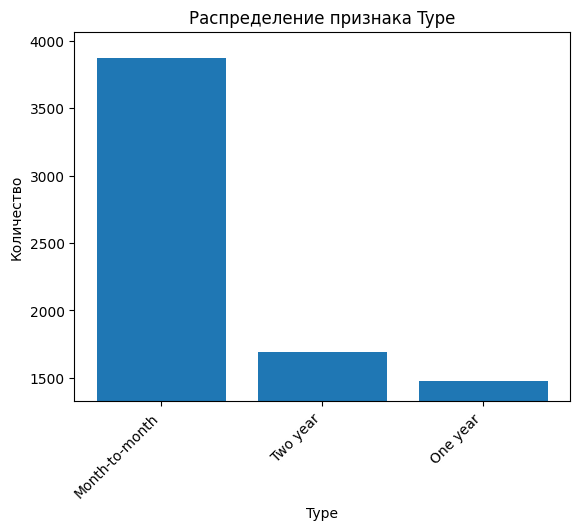

Смотрим статистику: PaperlessBilling


count     7043
unique       2
top        Yes
freq      4171
Name: PaperlessBilling, dtype: object

Лидеров и аутсайдеров: 


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

Посмотрим на графике: 


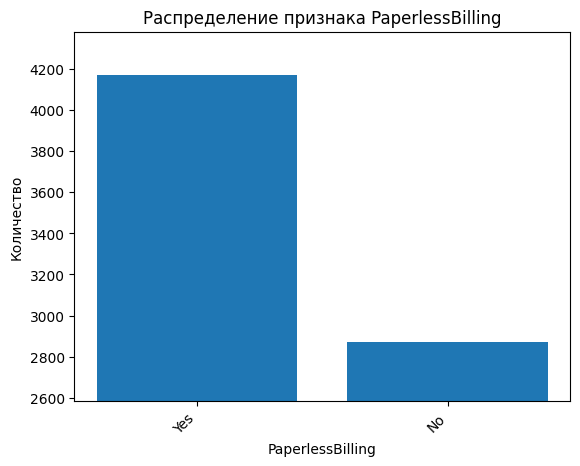

Смотрим статистику: PaymentMethod


count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

Лидеров и аутсайдеров: 


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Посмотрим на графике: 


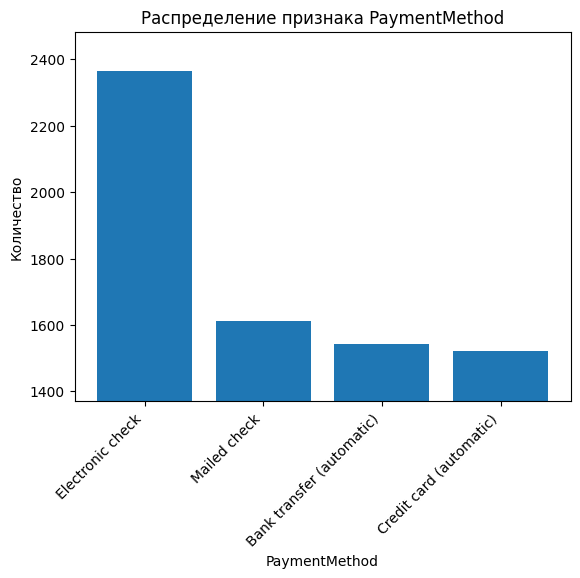

Смотрим статистику: MonthlyCharges


count   7043.0
mean      64.8
std       30.1
min       18.2
25%       35.5
50%       70.3
75%       89.8
max      118.8
Name: MonthlyCharges, dtype: float64

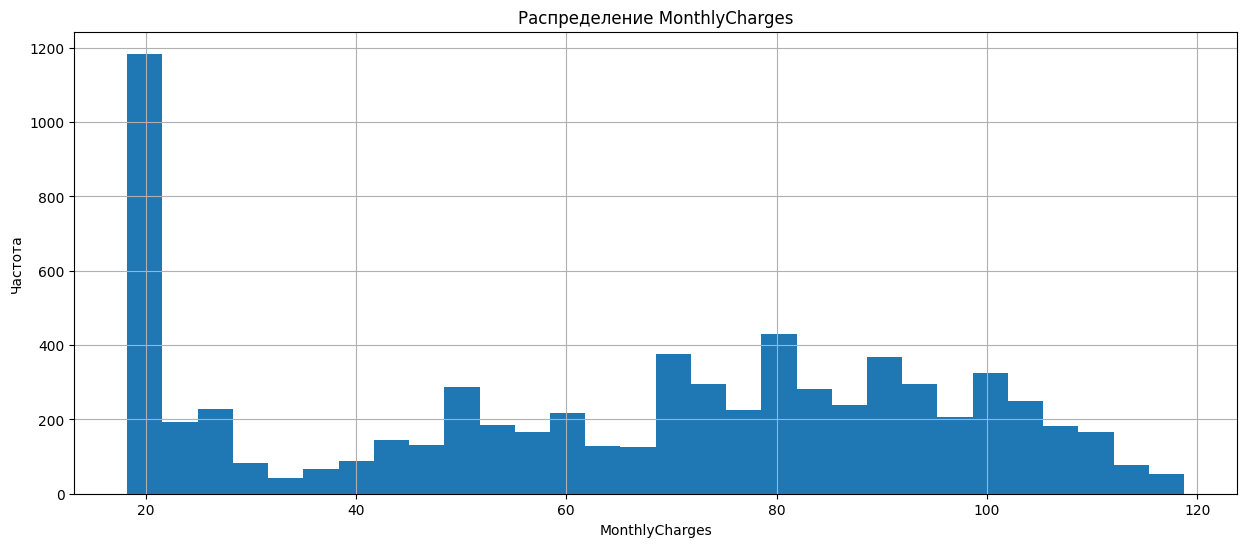

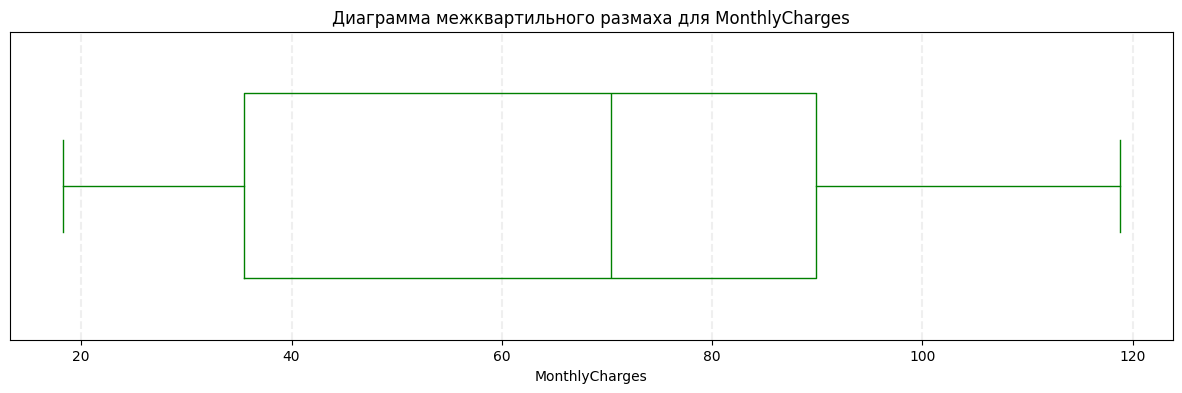


 MonthlyCharges находится в диапазоне от 18.25 до 118.75, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 89.8 
 
 Всего значений отличных от 0: 7043.0. 
 1Q = 35.5, 
 3Q = 89.8, 
 Межквартильный размах = 54.3,
Смотрим статистику: TotalCharges


count   7043.0
mean    2115.3
std     2112.7
min        0.0
25%      436.8
50%     1343.3
75%     3236.7
max     9221.4
Name: TotalCharges, dtype: float64

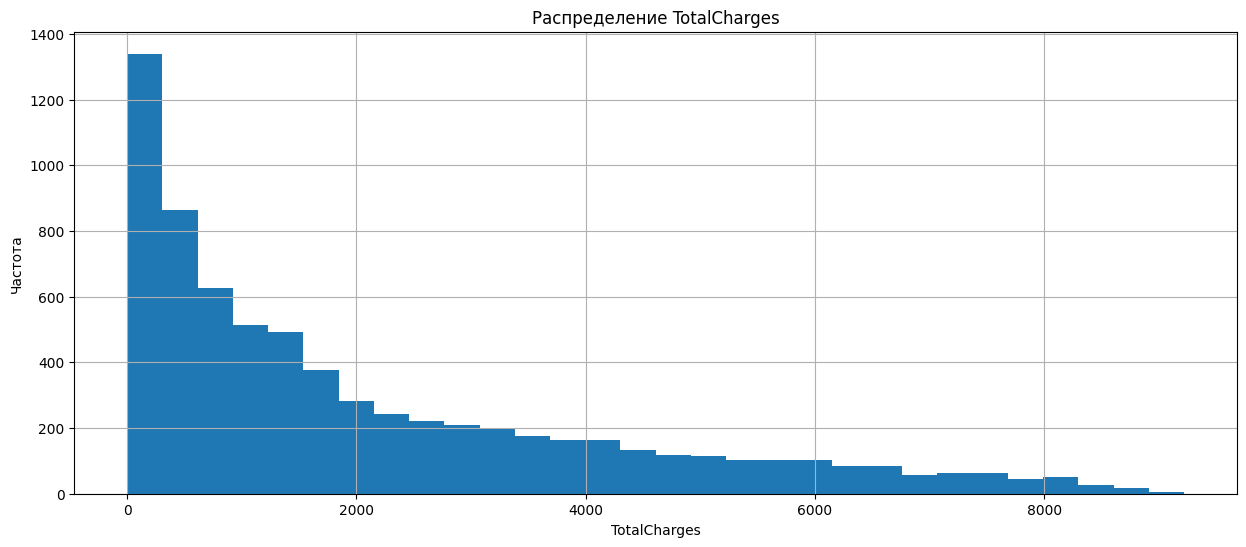

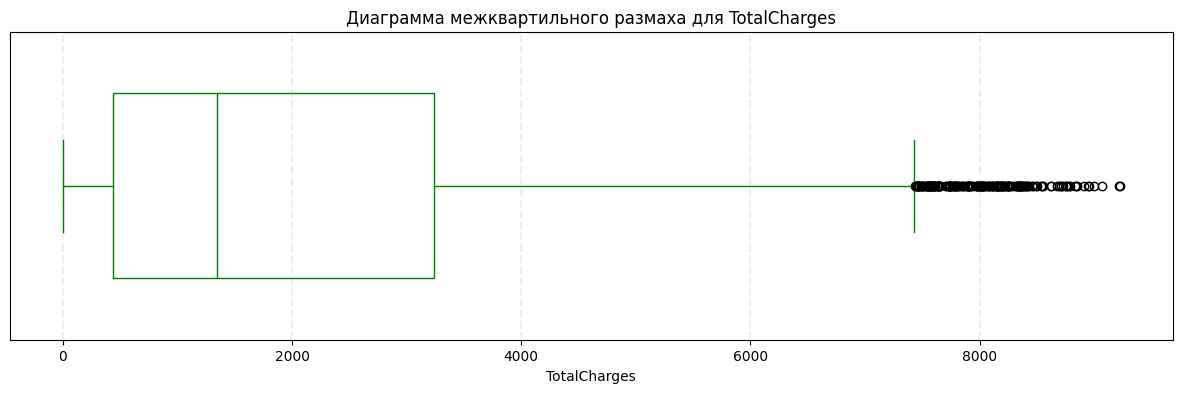


 TotalCharges находится в диапазоне от 0.00 до 9221.38, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 3236.7 
 
 Всего значений отличных от 0: 7032.0. 
 1Q = 436.8, 
 3Q = 3236.7, 
 Межквартильный размах = 2799.9,
Смотрим статистику: Result


count   7043.0
mean       0.2
std        0.4
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        1.0
Name: Result, dtype: float64

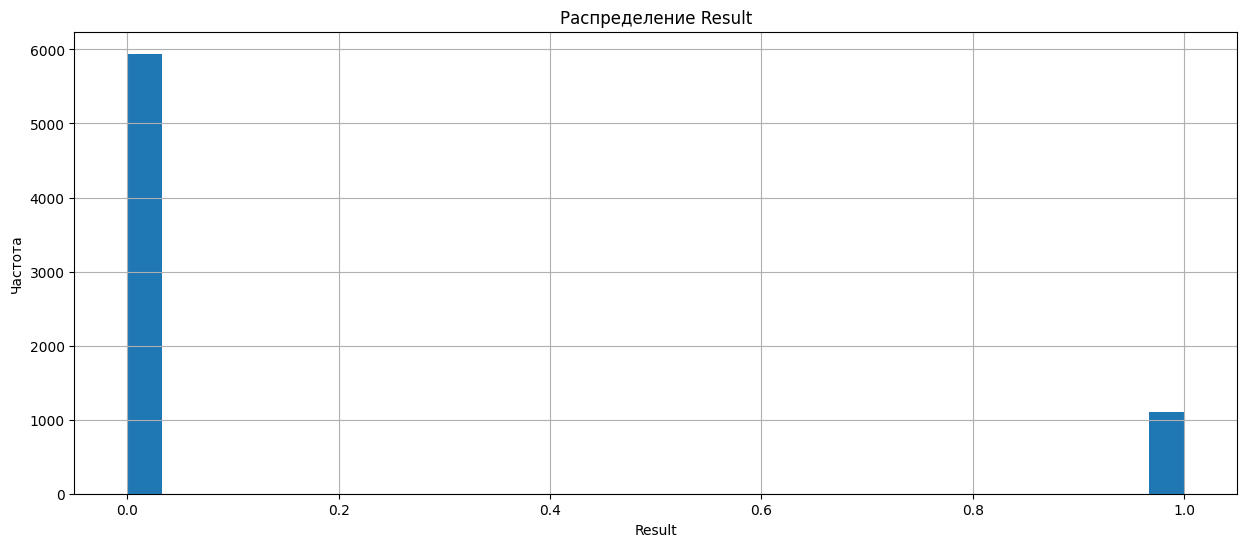

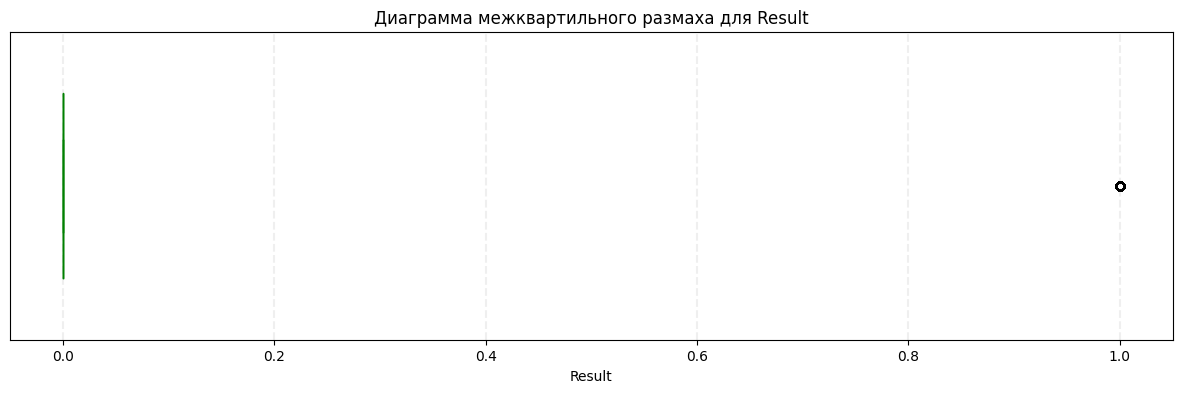


 Result находится в диапазоне от 0.00 до 1.00, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 0.0 
 
 Всего значений отличных от 0: 1101.0. 
 1Q = 0.0, 
 3Q = 0.0, 
 Межквартильный размах = 0.0,
Смотрим статистику: Gender


count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object

Лидеров и аутсайдеров: 


Gender
Male      3555
Female    3488
Name: count, dtype: int64

Посмотрим на графике: 


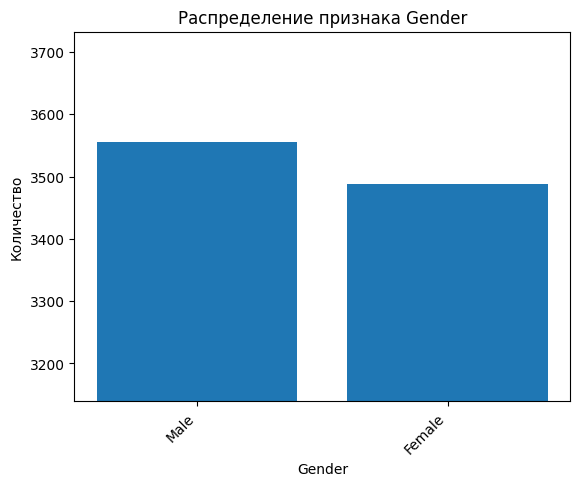

Смотрим статистику: SeniorCitizen


count     7043
unique       2
top          0
freq      5901
Name: SeniorCitizen, dtype: object

Лидеров и аутсайдеров: 


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Посмотрим на графике: 


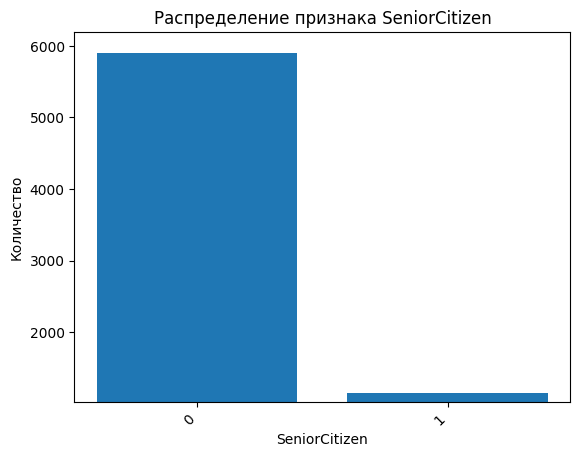

Смотрим статистику: Partner


count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object

Лидеров и аутсайдеров: 


Partner
No     3641
Yes    3402
Name: count, dtype: int64

Посмотрим на графике: 


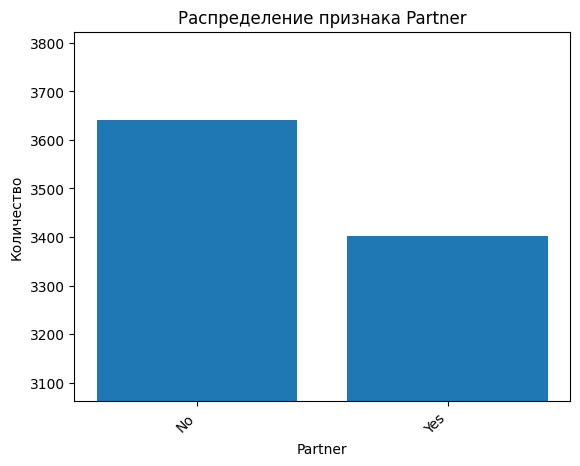

Смотрим статистику: Dependents


count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object

Лидеров и аутсайдеров: 


Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Посмотрим на графике: 


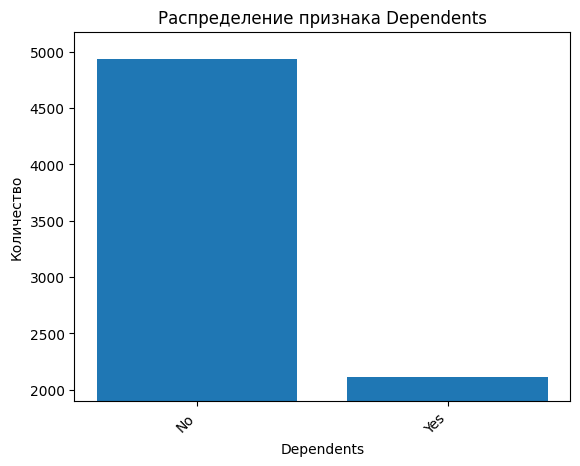

Смотрим статистику: InternetService


count            5517
unique              2
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

Лидеров и аутсайдеров: 


InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64

Посмотрим на графике: 


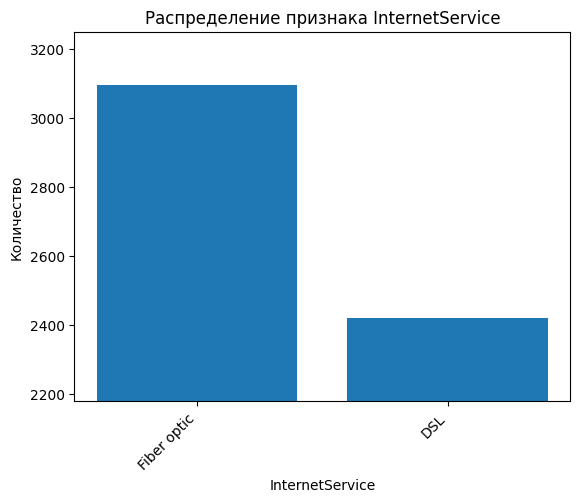

Смотрим статистику: OnlineSecurity


count     5517
unique       2
top         No
freq      3498
Name: OnlineSecurity, dtype: object

Лидеров и аутсайдеров: 


OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64

Посмотрим на графике: 


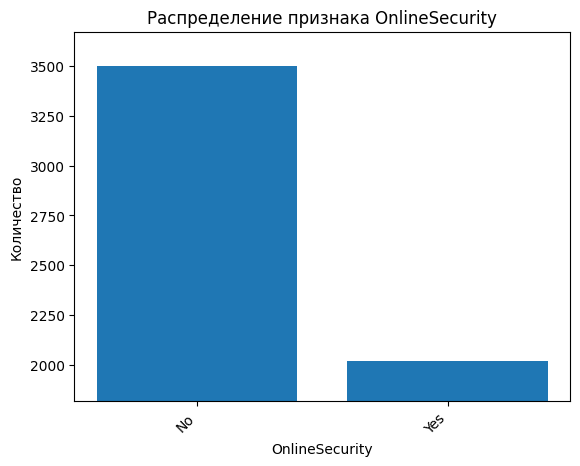

Смотрим статистику: OnlineBackup


count     5517
unique       2
top         No
freq      3088
Name: OnlineBackup, dtype: object

Лидеров и аутсайдеров: 


OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64

Посмотрим на графике: 


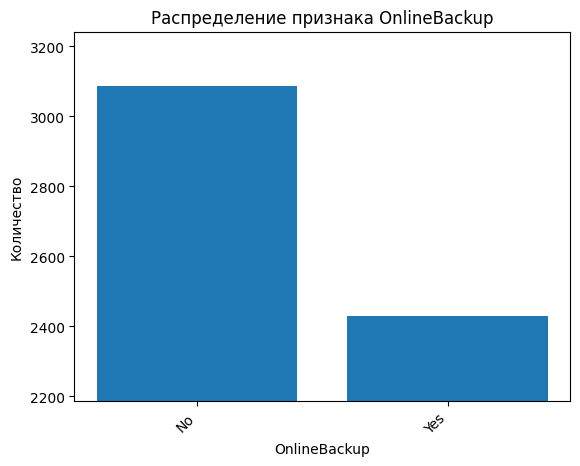

Смотрим статистику: DeviceProtection


count     5517
unique       2
top         No
freq      3095
Name: DeviceProtection, dtype: object

Лидеров и аутсайдеров: 


DeviceProtection
No     3095
Yes    2422
Name: count, dtype: int64

Посмотрим на графике: 


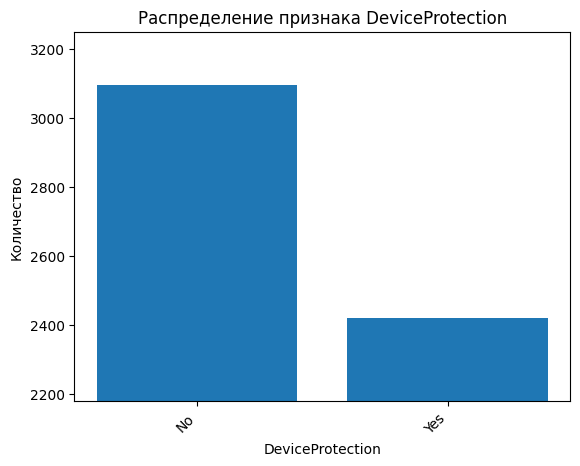

Смотрим статистику: TechSupport


count     5517
unique       2
top         No
freq      3473
Name: TechSupport, dtype: object

Лидеров и аутсайдеров: 


TechSupport
No     3473
Yes    2044
Name: count, dtype: int64

Посмотрим на графике: 


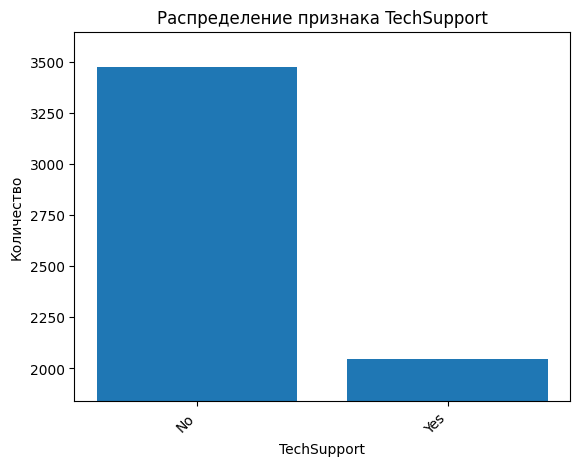

Смотрим статистику: StreamingTV


count     5517
unique       2
top         No
freq      2810
Name: StreamingTV, dtype: object

Лидеров и аутсайдеров: 


StreamingTV
No     2810
Yes    2707
Name: count, dtype: int64

Посмотрим на графике: 


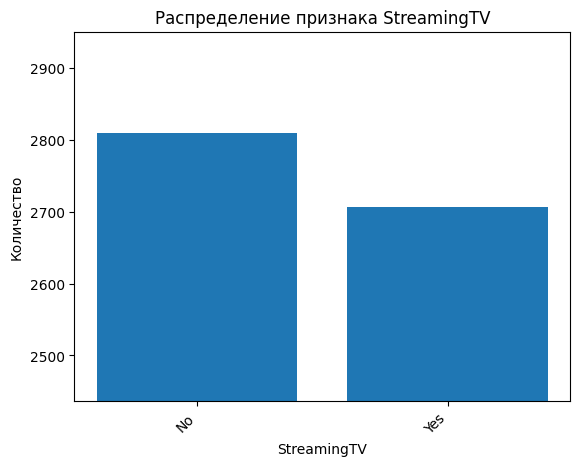

Смотрим статистику: StreamingMovies


count     5517
unique       2
top         No
freq      2785
Name: StreamingMovies, dtype: object

Лидеров и аутсайдеров: 


StreamingMovies
No     2785
Yes    2732
Name: count, dtype: int64

Посмотрим на графике: 


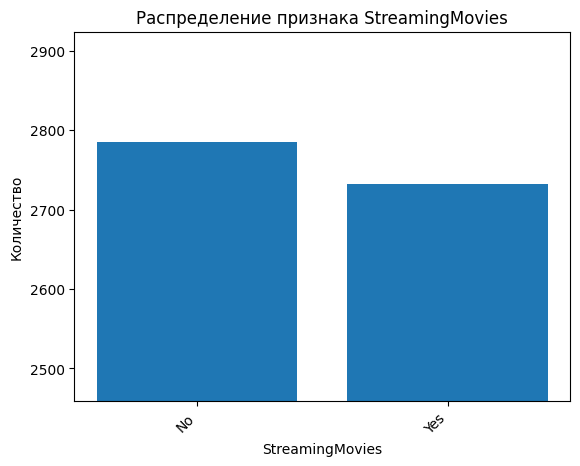

Смотрим статистику: MultipleLines


count     6361
unique       2
top         No
freq      3390
Name: MultipleLines, dtype: object

Лидеров и аутсайдеров: 


MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64

Посмотрим на графике: 


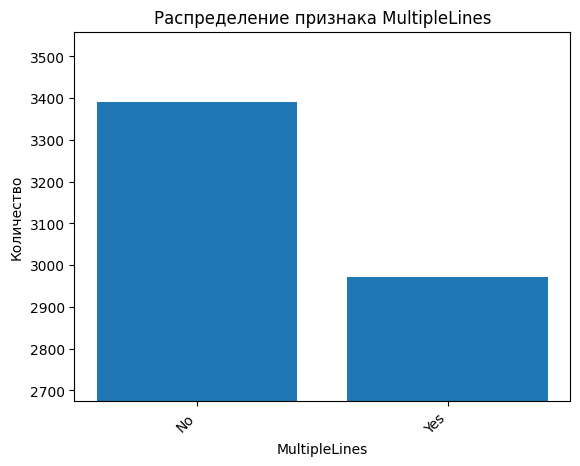

Смотрим статистику: LifeTime


count   7043.0
mean     898.6
std      683.1
min        0.0
25%      276.0
50%      761.0
75%     1461.0
max     2314.0
Name: LifeTime, dtype: float64

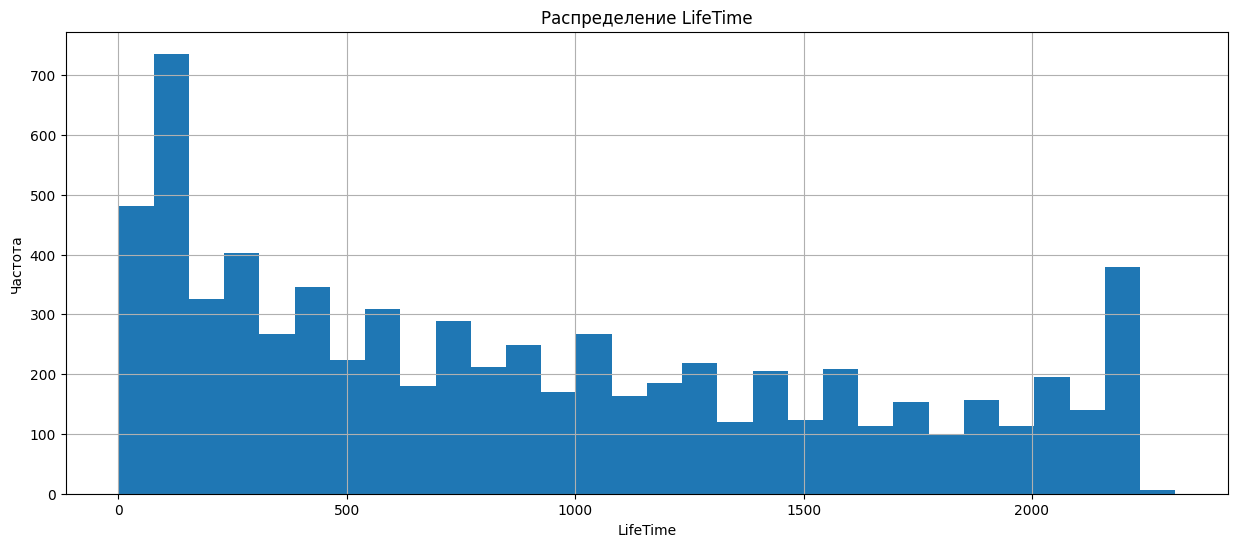

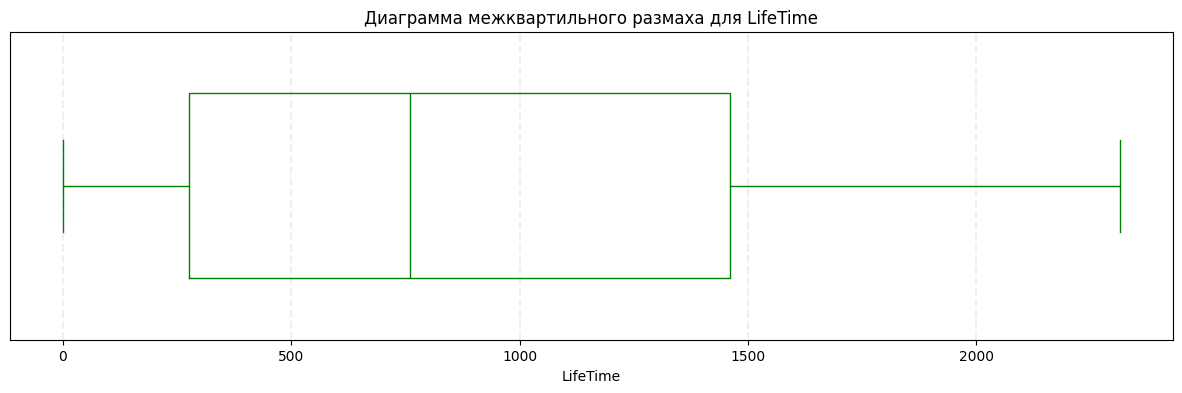


 LifeTime находится в диапазоне от 0.00 до 2314.00, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 1461.0 
 
 Всего значений отличных от 0: 7032.0. 
 1Q = 276.0, 
 3Q = 1461.0, 
 Межквартильный размах = 1185.0,


In [17]:
numeric_columns = df.select_dtypes(include='number').columns
text_columns = df.select_dtypes(include='object').columns
for j in df.columns:
    if 'customerID' in j: # Пропускаем столбцы, содержащие customerID, это просто номер, что на него смотреть. .lower()
        continue
    if j in numeric_columns:
        e_d_a(j, j, df)
    if j in text_columns:
        e_d_a_categorical(j, j, df)


# for i in table:
#     numeric_columns = i.select_dtypes(include='number').columns
#     text_columns = i.select_dtypes(include='object').columns
#     for j in i.columns:
#         if 'customerID' in j: # Пропускаем столбцы, содержащие customerID, это просто номер, что на него смотреть. .lower()
#             continue
#         if j in numeric_columns:
#             e_d_a(j, j, i)
#         if j in text_columns:
#             e_d_a_categorical(j, j, i)

Сделаем исследование для в зависимости от того к какому классу относится объект.

Смотрим статистику: Type


count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Type, dtype: object

Лидеров и аутсайдеров: 


Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Посмотрим на графике: 


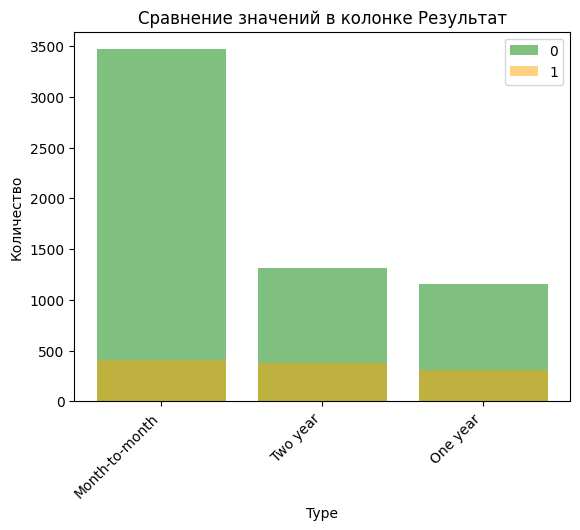

Смотрим статистику: PaperlessBilling


count     7043
unique       2
top        Yes
freq      4171
Name: PaperlessBilling, dtype: object

Лидеров и аутсайдеров: 


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

Посмотрим на графике: 


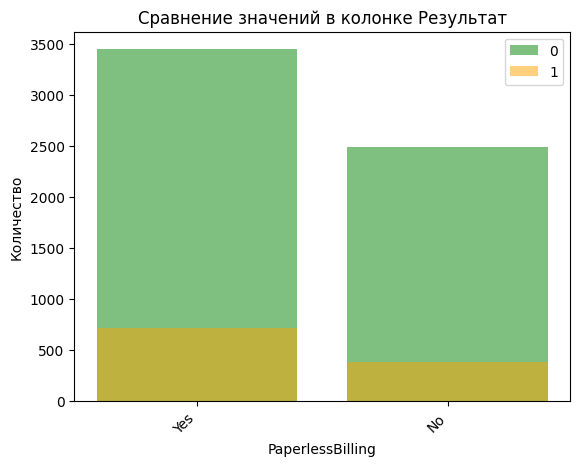

Смотрим статистику: PaymentMethod


count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

Лидеров и аутсайдеров: 


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Посмотрим на графике: 


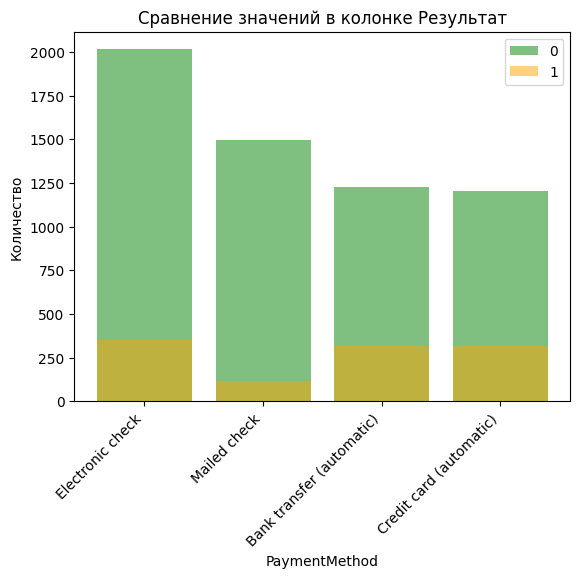

Смотрим статистику: MonthlyCharges


count   7043.0
mean      64.8
std       30.1
min       18.2
25%       35.5
50%       70.3
75%       89.8
max      118.8
Name: MonthlyCharges, dtype: float64

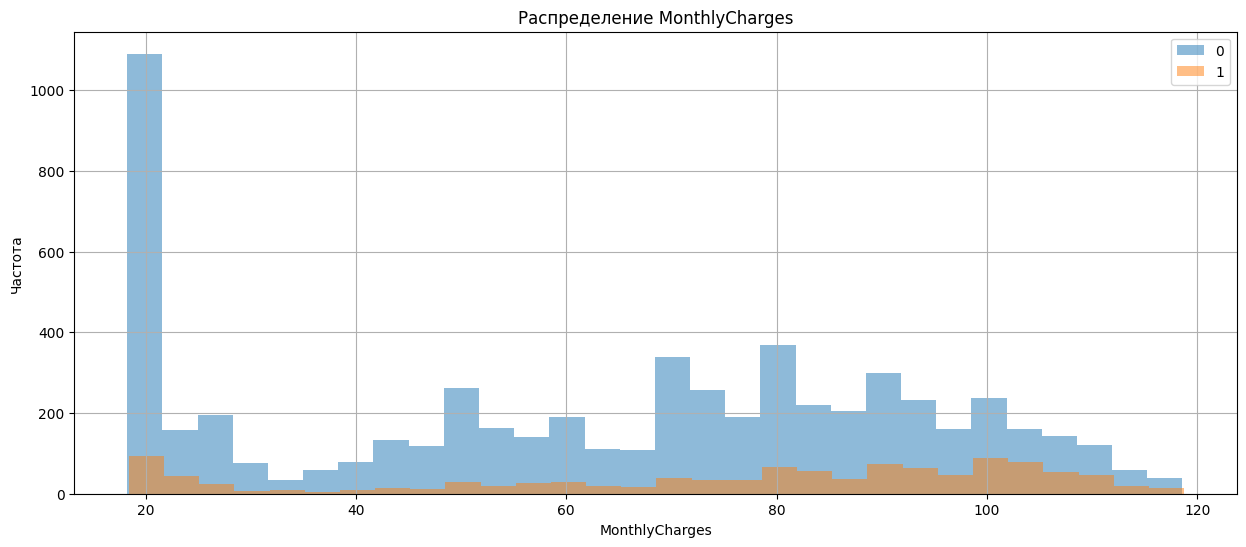

<Figure size 1500x400 with 0 Axes>

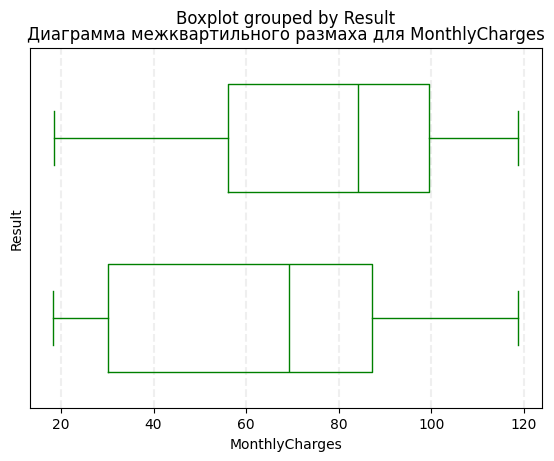


 MonthlyCharges находится в диапазоне от 18.25 до 118.75, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 89.8 
 
 Всего значений отличных от 0: 7043.0. 
 1Q = 35.5, 
 3Q = 89.8, 
 Межквартильный размах = 54.3,
Смотрим статистику: TotalCharges


count   7043.0
mean    2115.3
std     2112.7
min        0.0
25%      436.8
50%     1343.3
75%     3236.7
max     9221.4
Name: TotalCharges, dtype: float64

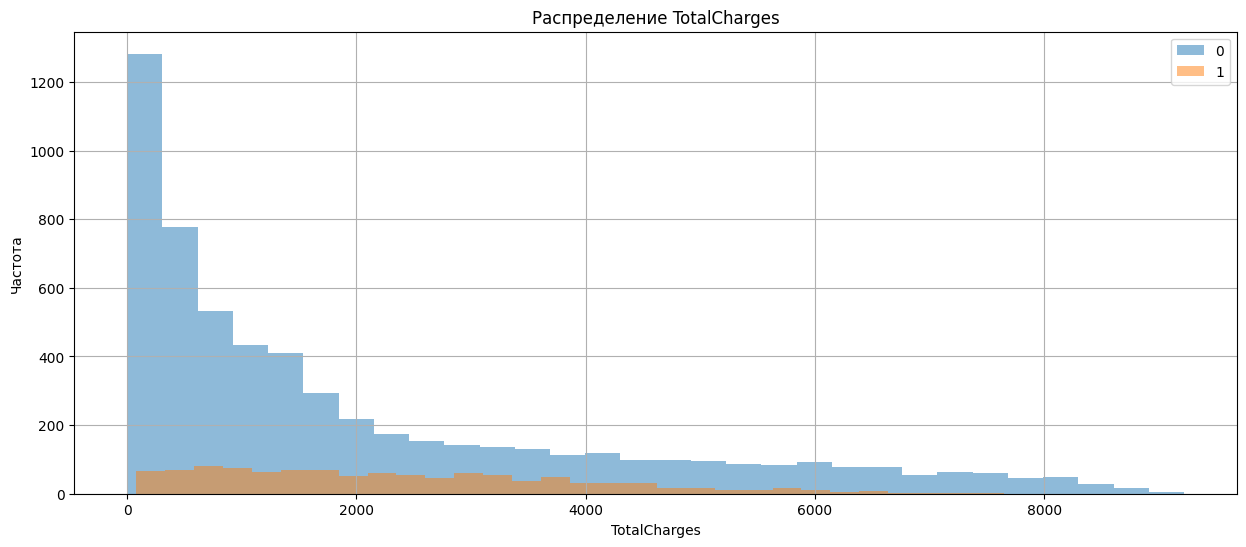

<Figure size 1500x400 with 0 Axes>

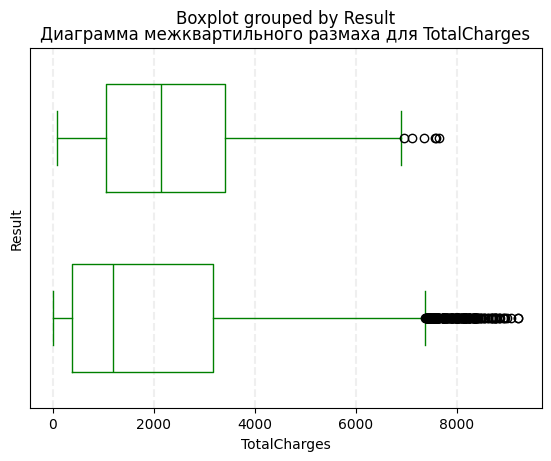


 TotalCharges находится в диапазоне от 0.00 до 9221.38, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 3236.7 
 
 Всего значений отличных от 0: 7032.0. 
 1Q = 436.8, 
 3Q = 3236.7, 
 Межквартильный размах = 2799.9,
Смотрим статистику: Result


count   7043.0
mean       0.2
std        0.4
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        1.0
Name: Result, dtype: float64

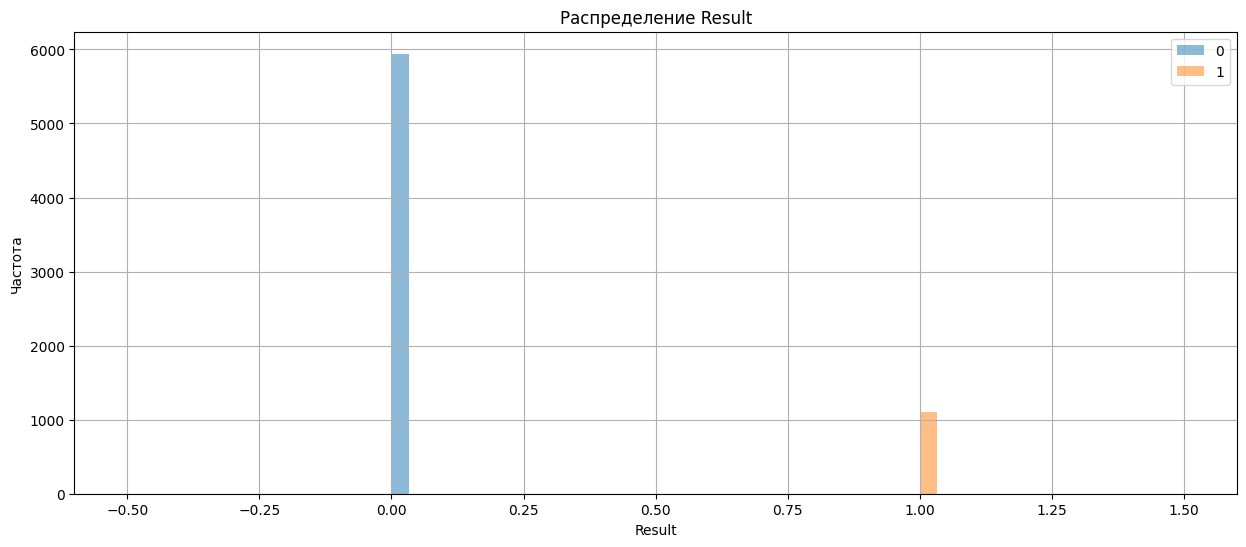

<Figure size 1500x400 with 0 Axes>

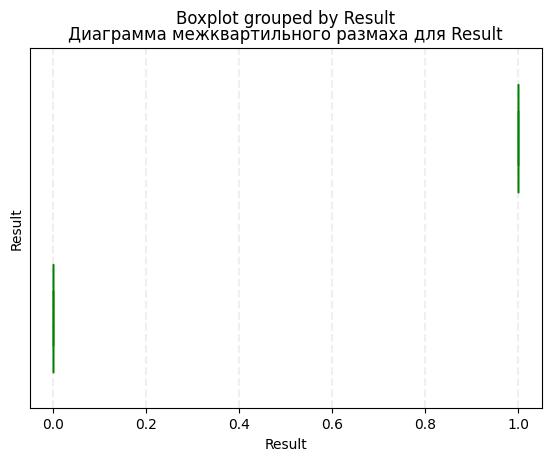


 Result находится в диапазоне от 0.00 до 1.00, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 0.0 
 
 Всего значений отличных от 0: 1101.0. 
 1Q = 0.0, 
 3Q = 0.0, 
 Межквартильный размах = 0.0,
Смотрим статистику: Gender


count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object

Лидеров и аутсайдеров: 


Gender
Male      3555
Female    3488
Name: count, dtype: int64

Посмотрим на графике: 


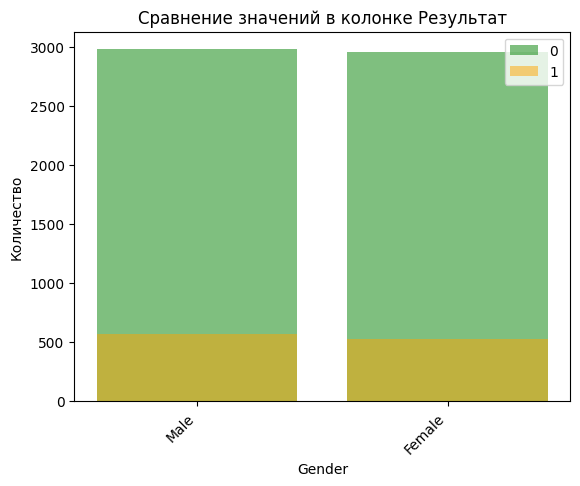

Смотрим статистику: SeniorCitizen


count     7043
unique       2
top          0
freq      5901
Name: SeniorCitizen, dtype: object

Лидеров и аутсайдеров: 


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Посмотрим на графике: 


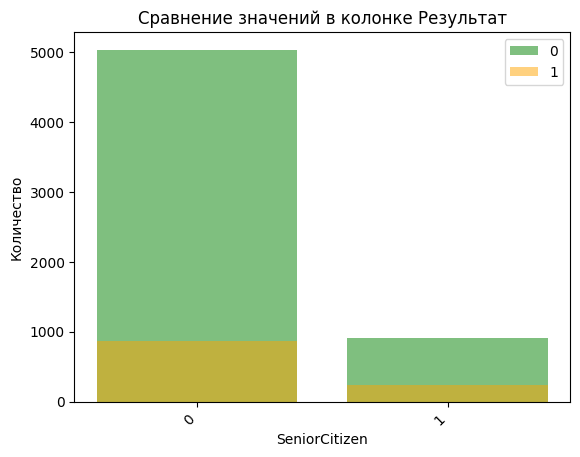

Смотрим статистику: Partner


count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object

Лидеров и аутсайдеров: 


Partner
No     3641
Yes    3402
Name: count, dtype: int64

Посмотрим на графике: 


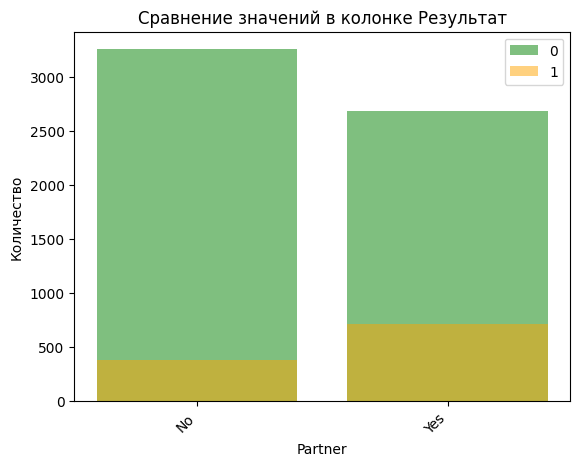

Смотрим статистику: Dependents


count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object

Лидеров и аутсайдеров: 


Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Посмотрим на графике: 


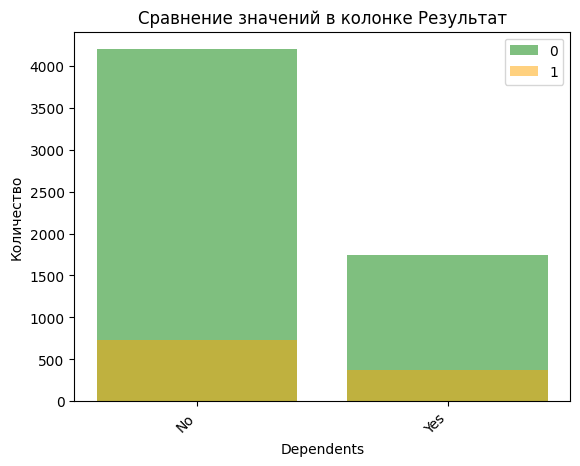

Смотрим статистику: InternetService


count            5517
unique              2
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

Лидеров и аутсайдеров: 


InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64

Посмотрим на графике: 


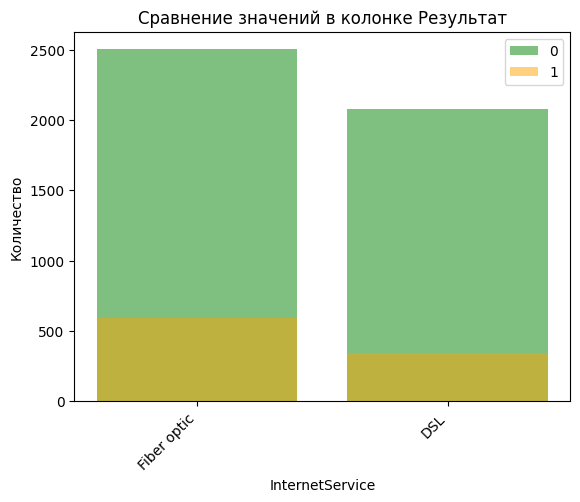

Смотрим статистику: OnlineSecurity


count     5517
unique       2
top         No
freq      3498
Name: OnlineSecurity, dtype: object

Лидеров и аутсайдеров: 


OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64

Посмотрим на графике: 


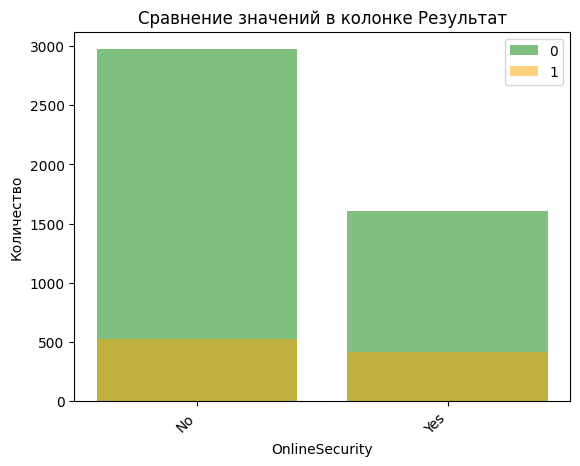

Смотрим статистику: OnlineBackup


count     5517
unique       2
top         No
freq      3088
Name: OnlineBackup, dtype: object

Лидеров и аутсайдеров: 


OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64

Посмотрим на графике: 


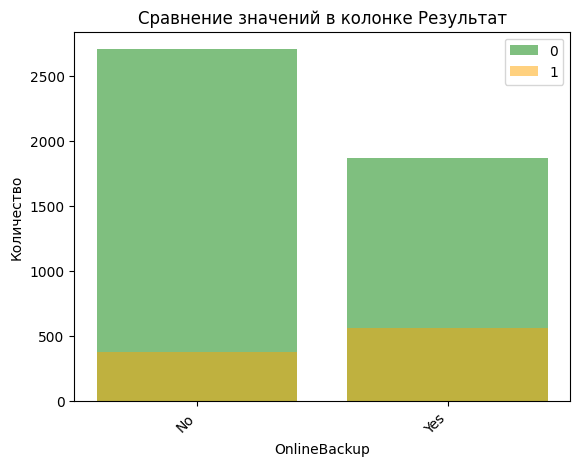

Смотрим статистику: DeviceProtection


count     5517
unique       2
top         No
freq      3095
Name: DeviceProtection, dtype: object

Лидеров и аутсайдеров: 


DeviceProtection
No     3095
Yes    2422
Name: count, dtype: int64

Посмотрим на графике: 


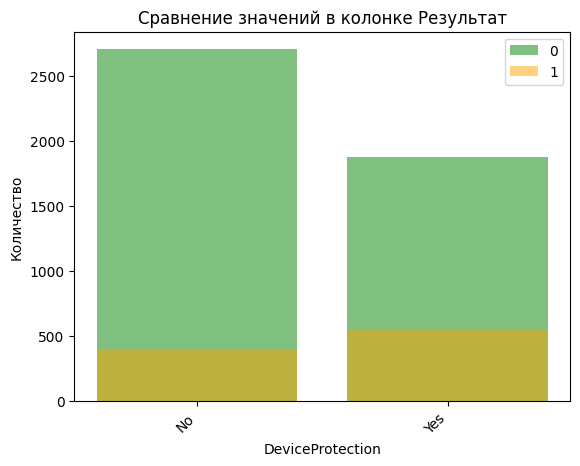

Смотрим статистику: TechSupport


count     5517
unique       2
top         No
freq      3473
Name: TechSupport, dtype: object

Лидеров и аутсайдеров: 


TechSupport
No     3473
Yes    2044
Name: count, dtype: int64

Посмотрим на графике: 


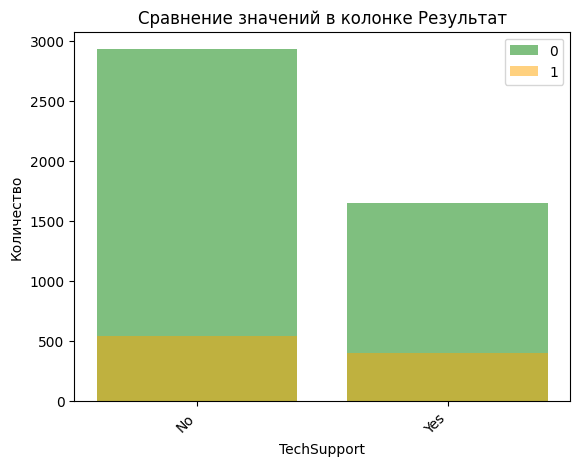

Смотрим статистику: StreamingTV


count     5517
unique       2
top         No
freq      2810
Name: StreamingTV, dtype: object

Лидеров и аутсайдеров: 


StreamingTV
No     2810
Yes    2707
Name: count, dtype: int64

Посмотрим на графике: 


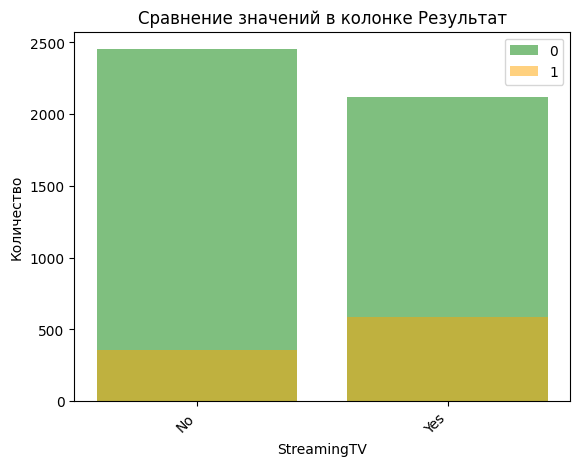

Смотрим статистику: StreamingMovies


count     5517
unique       2
top         No
freq      2785
Name: StreamingMovies, dtype: object

Лидеров и аутсайдеров: 


StreamingMovies
No     2785
Yes    2732
Name: count, dtype: int64

Посмотрим на графике: 


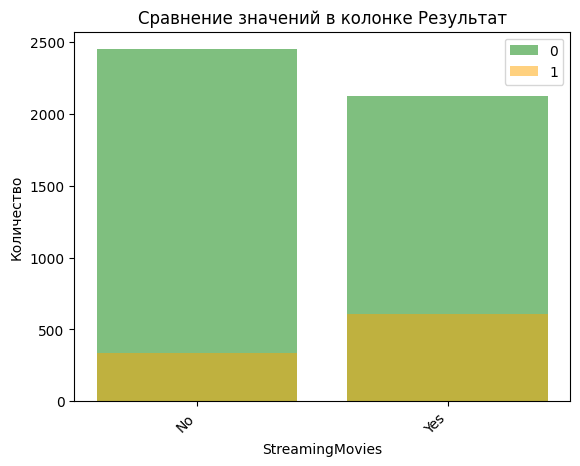

Смотрим статистику: MultipleLines


count     6361
unique       2
top         No
freq      3390
Name: MultipleLines, dtype: object

Лидеров и аутсайдеров: 


MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64

Посмотрим на графике: 


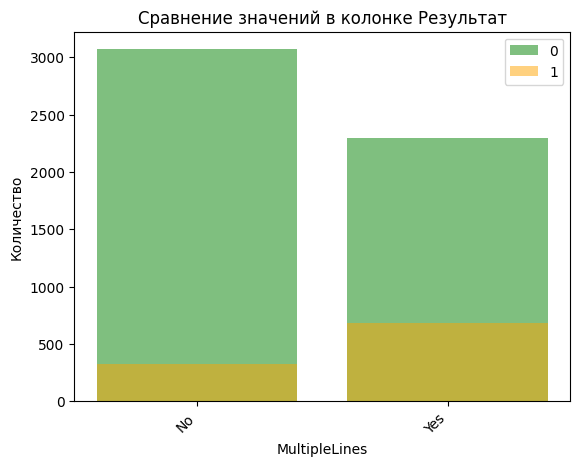

Смотрим статистику: LifeTime


count   7043.0
mean     898.6
std      683.1
min        0.0
25%      276.0
50%      761.0
75%     1461.0
max     2314.0
Name: LifeTime, dtype: float64

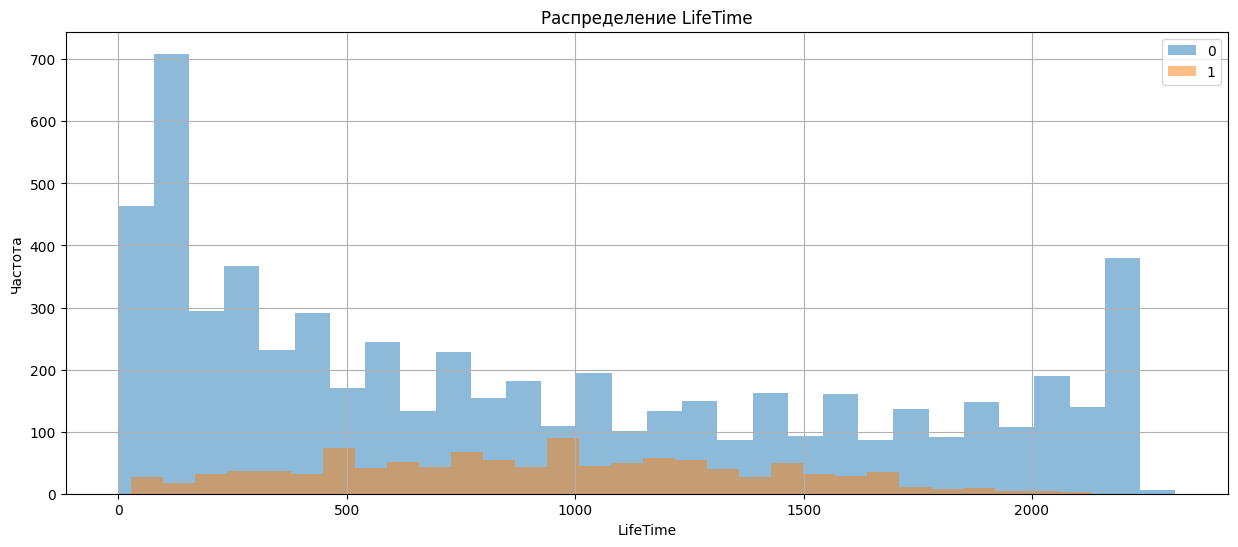

<Figure size 1500x400 with 0 Axes>

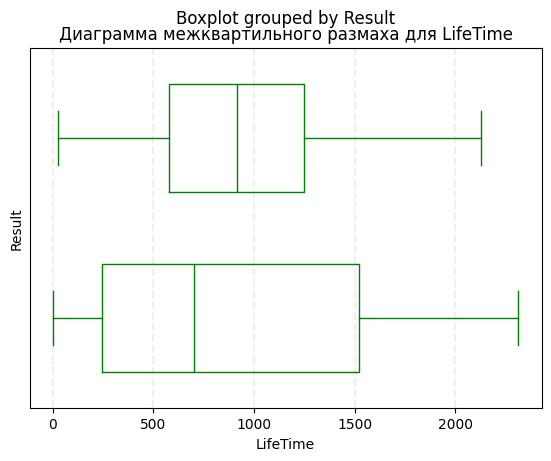


 LifeTime находится в диапазоне от 0.00 до 2314.00, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 1461.0 
 
 Всего значений отличных от 0: 7032.0. 
 1Q = 276.0, 
 3Q = 1461.0, 
 Межквартильный размах = 1185.0,


In [18]:
numeric_columns = df.select_dtypes(include='number').columns
text_columns = df.select_dtypes(include='object').columns
for j in df.columns:
    if 'customerID' in j: # Пропускаем столбцы, содержащие customerID, это просто номер, что на него смотреть. .lower()
        continue
    if j in numeric_columns:
        e_d_a_spl(j, j, df)
    if j in text_columns:
        e_d_a_categorical_spl(j, j, df)

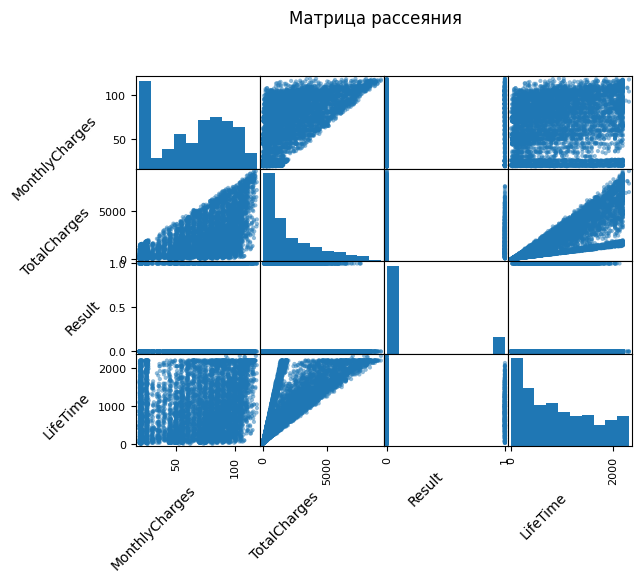

In [19]:
# Создание матрицы рассеяния
scatter_matrix = pd.plotting.scatter_matrix(df[df.select_dtypes(include='number').columns])

plt.suptitle('Матрица рассеяния', y=1.02)
for ax in scatter_matrix.ravel():
    ax.yaxis.label.set_rotation(45)
    ax.yaxis.label.set_ha('right')
    ax.xaxis.label.set_rotation(45)
    ax.xaxis.label.set_ha('right')

plt.show()

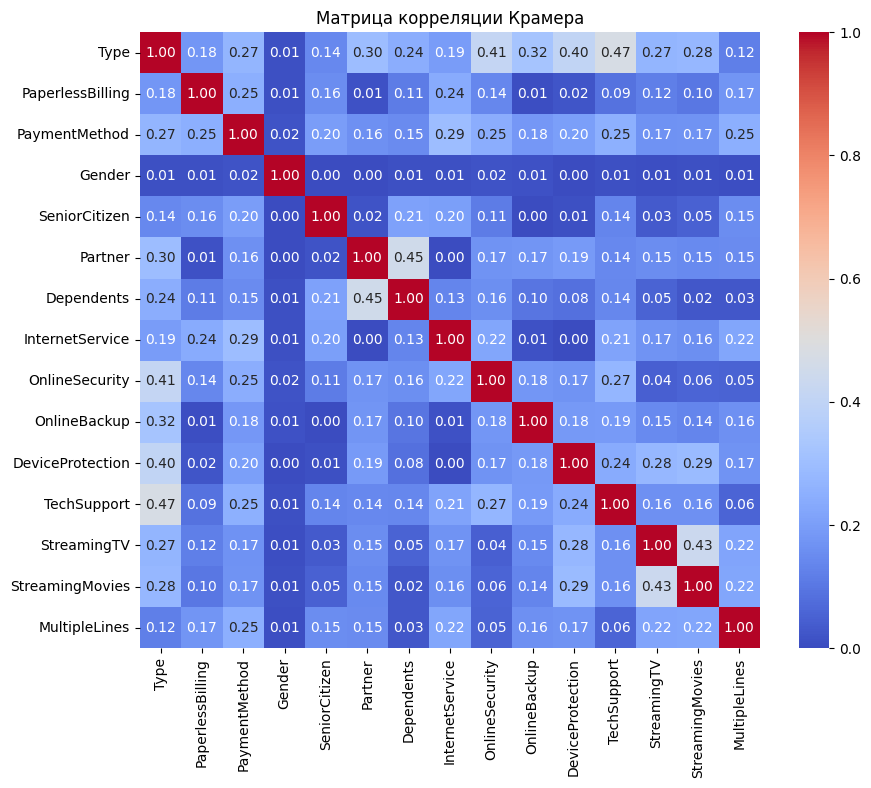

In [20]:

# Корреляция Крамера
def cramers(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))



categorical_cols = df.select_dtypes(include='object').columns.tolist()

cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for i in categorical_cols:
    for j in categorical_cols:
        cramers_v_matrix.loc[i, j] = cramers(df[i], df[j])
        
cramers_v_matrix = cramers_v_matrix.astype(float)


plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции Крамера')
plt.show()

Даты больше не нужны, никакие дополнительные признаки мы из них не получим, можем удалить.

In [21]:
df.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

**Выводы:**
1. Как мы видим у нас явный дисбаланс классов в целевом признаке.
2. Нормального распределения ни по одному признаку не наблюдается.
3. Целевой признак распределен более равномерно по признакам для тех кто остался лояльным компании.
4. Мультиколлинеарность не наблюдается.
5. При помесячной оплате выше доля тех кто прекратил сотрудничество.

## Статистическая проверка гипотезы

H0 -время жизни одинаковое для тех кто продолжил сотрудничество и прекратил сотрудничество.

In [22]:
# Создаем кросс-таблицу для категориальных переменных
cross_table = pd.crosstab(df['Result'], df['LifeTime'])

# Выполняем хи-квадрат тест
chi2_stat, p_value, dof, expected = chi2_contingency(cross_table)

print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"P-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: есть значимые различия между категориями 'lifetime' в зависимости от Результата.")
else:
    print("Не можем отклонить нулевую гипотезу: нет значимых различий между категориями 'lifetime' в зависимости от Результат.")

Хи-квадрат статистика: 4809.125322619158
P-значение: 0.0
Отклоняем нулевую гипотезу: есть значимые различия между категориями 'lifetime' в зависимости от Результата.


## Разделение выборок

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop([
        'Result',
    ], axis=1),
    df['Result'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['Result']
    )

## Строим модель

### Подготовка

### Обучение baseline

In [24]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE)

# Определяем столбцы для OHE и числовые столбцы
ohe_columns = X_train_split.select_dtypes(include=['category', 'object']).columns
num_columns = X_train_split.select_dtypes(include='number').columns

# Препроцессор для обработки столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ohe_columns)
    ]
)

# Создаем и обучаем модель
baseline_model = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(random_state=RANDOM_STATE))
])

baseline_model.fit(X_train_split, y_train_split)

# Оценка модели на валидационной выборке
y_val_pred = baseline_model.predict(X_val)
y_val_pred_proba = baseline_model.predict_proba(X_val)[:, 1]  # Получаем вероятности для положительного класса

baseline_f1 = f1_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc_baseline = roc_auc_score(y_val, y_val_pred_proba)

print(f'F1 Score для базовой модели: {baseline_f1:.4f}')
print(f'ROC-AUC: {roc_auc_baseline:.4f}')  # Исправлено имя переменной
print(f'Accuracy для модели baseline: {accuracy:.4f}')

F1 Score для базовой модели: 0.2979
ROC-AUC: 0.7330
Accuracy для модели baseline: 0.8439


### Обучение CatBoost

In [25]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE)

# Определяем столбцы для OHE и числовые столбцы
ohe_columns = X_train_split.select_dtypes(include=['category', 'object']).columns
num_columns = X_train_split.select_dtypes(include='number').columns

# # Заполняем пропуски в категориальных столбцах
X_train_split[ohe_columns] = X_train_split[ohe_columns].fillna("missing")
X_val[ohe_columns] = X_val[ohe_columns].fillna("missing")

# Создаем экземпляр CatBoostClassifier
catboost_model = CatBoostClassifier(
    cat_features=list(ohe_columns), 
    random_state=RANDOM_STATE, 
    verbose=0
)

# Обучаем модель
catboost_model.fit(X_train_split, y_train_split)

# Оценка модели на валидационной выборке
y_val_pred = catboost_model.predict(X_val)

# Оценка модели
baseline_f1 = f1_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc_cat = roc_auc_score(y_val, y_val_pred_proba)

print(f'F1 Score для модели CatBoost: {baseline_f1:.4f}')
print(f'ROC-AUC: {roc_auc_cat:.4f}')
print(f'Accuracy для модели CatBoost: {accuracy:.4f}')

F1 Score для модели CatBoost: 0.3871
ROC-AUC: 0.7330
Accuracy для модели CatBoost: 0.8562


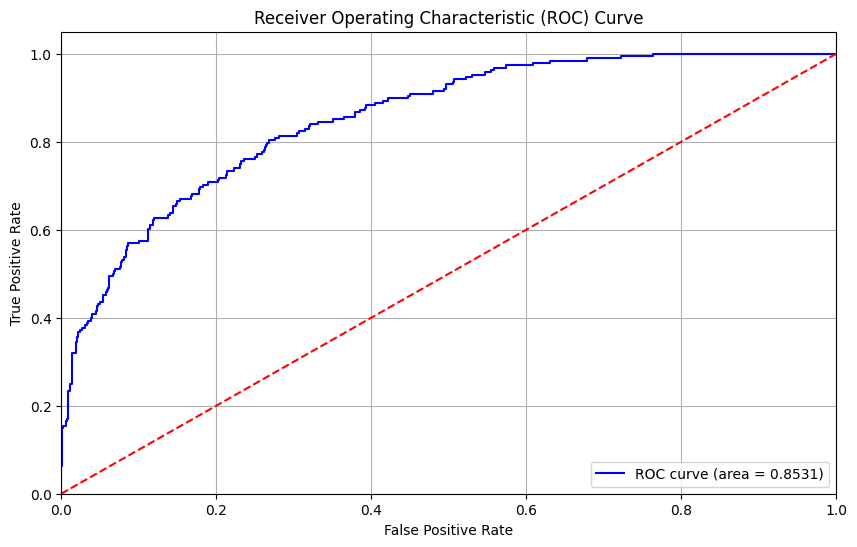

In [26]:
y_val_pred_proba = catboost_model.predict_proba(X_val)[:, 1]

# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)

# Вычисляем AUC
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

# Рисуем график ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [27]:
ohe_columns = X_train_split.select_dtypes(include=['category', 'object']).columns

# Преобразуем категориальные столбцы в тип 'category'
for col in ohe_columns:
    X_train_split[col] = X_train_split[col].astype('category')
    X_val[col] = X_val[col].astype('category')

# Создаем экземпляр LGBMClassifier
lgbm_model = lgb.LGBMClassifier(random_state=RANDOM_STATE)

# Обучаем модель
lgbm_model.fit(X_train_split, y_train_split)

# Предсказания на валидационной выборке
y_val_pred = lgbm_model.predict(X_val)

# Получаем вероятности предсказаний для ROC-AUC
y_val_pred_proba = lgbm_model.predict_proba(X_val)[:, 1]

# Оценка модели
baseline_f1 = f1_score(y_val, y_val_pred)
roc_auc_lgbm = roc_auc_score(y_val, y_val_pred_proba)
accuracy = accuracy_score(y_val, y_val_pred)

print(f'F1 Score для модели LightGBM: {baseline_f1:.4f}')
print(f'ROC-AUC Score для модели LightGBM: {roc_auc_lgbm:.4f}')
print(f'Accuracy для модели LightGBM: {accuracy:.4f}')

[LightGBM] [Info] Number of positive: 638, number of negative: 3587
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 4225, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151006 -> initscore=-1.726733
[LightGBM] [Info] Start training from score -1.726733
F1 Score для модели LightGBM: 0.4945
ROC-AUC Score для модели LightGBM: 0.8703
Accuracy для модели LightGBM: 0.8685


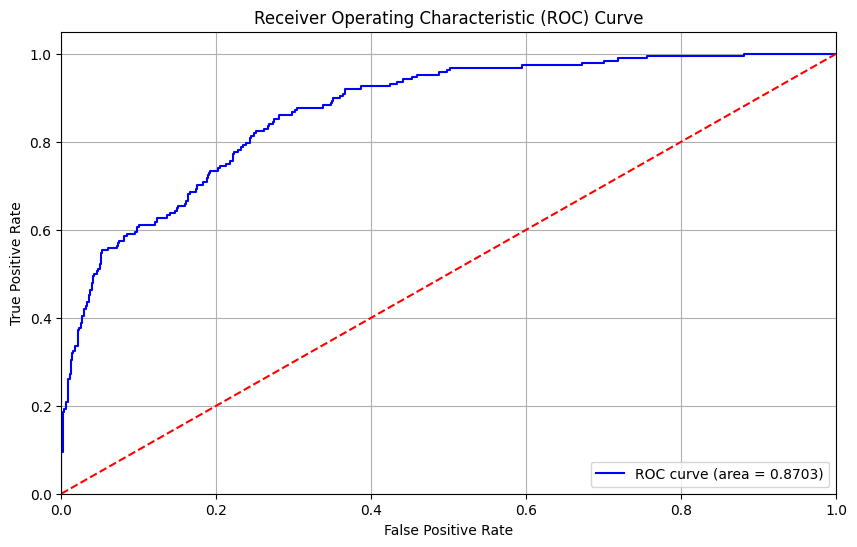

In [28]:
# y_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]

y_val_pred_proba = lgbm_model.predict_proba(X_val)[:, 1]

# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)

# Вычисляем AUC
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

# Рисуем график ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [37]:
lgbm_proba = lgbm_model.predict_proba(X_val)[:, 1]
catboost_proba = catboost_model.predict_proba(X_val)[:, 1]
baseline_proba = baseline_model.predict_proba(X_val)[:, 1]

# Создаем новый набор данных для мета-модели
meta_X_train = np.column_stack([lgbm_model.predict_proba(X_train_split)[:, 1],
                                catboost_model.predict_proba(X_train_split)[:, 1],
                                baseline_model.predict_proba(X_train_split)[:, 1]])

meta_X_val = np.column_stack([lgbm_proba, catboost_proba, baseline_proba])

# Преобразуем данные в тензоры
X_train_tensor = torch.tensor(meta_X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(meta_X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_split.values, dtype=torch.float32).unsqueeze(1)  # Добавляем размерность для выхода
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# Определяем нейросеть
class MetaModel(nn.Module):
    def __init__(self, input_dim):
        super(MetaModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 16),  # Входной слой
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(16, 8),  # Скрытый слой
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(8, 1),  # Выходной слой
            nn.Sigmoid()  # Для вероятностей
        )
    
    def forward(self, x):
        return self.network(x)

# Инициализация модели
input_dim = meta_X_train.shape[1]
model = MetaModel(input_dim)

# Определяем функцию потерь и оптимизатор
criterion = nn.BCELoss()  # Для бинарной классификации
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Обучение модели
epochs = 100
batch_size = 32
train_size = X_train_tensor.size(0)

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for i in range(0, train_size, batch_size):
        # Получаем мини-батч данных
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        
        # Прямой проход
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Обратное распространение и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/train_size:.4f}")

# Оценка модели
model.eval()
with torch.no_grad():
    # Предсказания для валидационной выборки
    y_pred_proba = model(X_val_tensor).numpy().flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

# Метрики
meta_f1 = f1_score(y_val, y_pred)
meta_roc_auc = roc_auc_score(y_val, y_pred_proba)
meta_accuracy = accuracy_score(y_val, y_pred)

print(f'F1 Score для мета-модели: {meta_f1:.4f}')
print(f'ROC-AUC для мета-модели: {meta_roc_auc:.4f}')
print(f'Accuracy для мета-модели: {meta_accuracy:.4f}')

Epoch 1/100, Loss: 0.0249
Epoch 2/100, Loss: 0.0243
Epoch 3/100, Loss: 0.0237
Epoch 4/100, Loss: 0.0232
Epoch 5/100, Loss: 0.0226
Epoch 6/100, Loss: 0.0215
Epoch 7/100, Loss: 0.0204
Epoch 8/100, Loss: 0.0192
Epoch 9/100, Loss: 0.0182
Epoch 10/100, Loss: 0.0172
Epoch 11/100, Loss: 0.0164
Epoch 12/100, Loss: 0.0157
Epoch 13/100, Loss: 0.0150
Epoch 14/100, Loss: 0.0145
Epoch 15/100, Loss: 0.0139
Epoch 16/100, Loss: 0.0135
Epoch 17/100, Loss: 0.0133
Epoch 18/100, Loss: 0.0129
Epoch 19/100, Loss: 0.0126
Epoch 20/100, Loss: 0.0123
Epoch 21/100, Loss: 0.0119
Epoch 22/100, Loss: 0.0117
Epoch 23/100, Loss: 0.0115
Epoch 24/100, Loss: 0.0114
Epoch 25/100, Loss: 0.0111
Epoch 26/100, Loss: 0.0109
Epoch 27/100, Loss: 0.0105
Epoch 28/100, Loss: 0.0106
Epoch 29/100, Loss: 0.0101
Epoch 30/100, Loss: 0.0101
Epoch 31/100, Loss: 0.0098
Epoch 32/100, Loss: 0.0098
Epoch 33/100, Loss: 0.0094
Epoch 34/100, Loss: 0.0091
Epoch 35/100, Loss: 0.0090
Epoch 36/100, Loss: 0.0087
Epoch 37/100, Loss: 0.0085
Epoch 38/1

**Выводы:**

Лучшее решение показала модель lgbm с показателем ROC-AUC 0.8703, дальше мы протестируем на тестовых данных выбранную модель.

## Тестирование модели

In [ ]:
for col in ohe_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')
y_pred = lgbm_model.predict(X_test)

y_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]

baseline_f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)  

print(f'F1 Score для модели LightGBM: {baseline_f1:.4f}')
print(f'ROC-AUC Score для модели LightGBM: {roc_auc:.4f}')
print(f'Accuracy для модели LightGBM: {accuracy:.4f}')

F1 Score для модели LightGBM: 0.4976
ROC-AUC Score для модели LightGBM: 0.8732
Accuracy для модели LightGBM: 0.8830


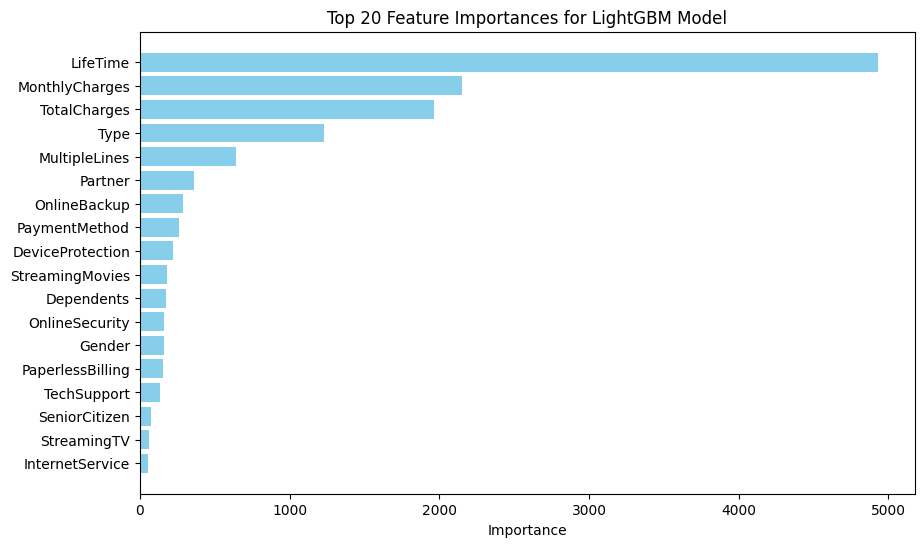

F1 Score для модели LightGBM: 0.4976
ROC-AUC Score для модели LightGBM: 0.8732
Accuracy для модели LightGBM: 0.8830


In [41]:
importance = lgbm_model.booster_.feature_importance(importance_type='gain')  # Можно использовать 'split' или 'gain'
feature_names = X_train.columns  # Получаем имена признаков

# Создаем DataFrame для удобства
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances for LightGBM Model')
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшего отображения
plt.show()

# Оценка модели на тестовой выборке
y_pred = lgbm_model.predict(X_test)
y_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]

# Вычисление метрик
baseline_f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

# Вывод метрик
print(f'F1 Score для модели LightGBM: {baseline_f1:.4f}')
print(f'ROC-AUC Score для модели LightGBM: {roc_auc:.4f}')
print(f'Accuracy для модели LightGBM: {accuracy:.4f}')

**Выводы:**
LightGBM на тестовых данных показала результат лучше, чем на валидационных, оставляем LightGBM как итоговую модель.

## Выводы

1. Лучшая модель LightGBM на тестовых данных показала ROC-AUC - 0.8732, а Accuracy - 0.8830.
2. Ансамбль моделей на валидационных данных дал показатели не намного выше, чем LightGBM, поэтому было принято решение не использовать ансамль методов.
3. По результатам анализа выяснили, что те кто платят не помесячно, а за более длительный период - более лояльны.
4. Так же те кто дольше сотрудничают с компанией, дольше с ней остаются.
5. Так же значение имеет какой тип подключения у него есть.

**Рекомендации:** нужно продавать длительные подписки, на 1 -2 года. Воможно стоит дифференцировать клиентов по типу подключения. Если у клиента, нет альтернатив, то стоит посчитать эластичность по тем у кого оптика и другие способы подключения. 